In [0]:
##Importing libraries 

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from   tensorflow.examples.tutorials.mnist import input_data


In [2]:
## Reading the data
df=input_data.read_data_sets("/tmp/data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

In [0]:
###Neural Network Parameters
### 28*28=784

img_dim=784
gen_dim=256
disc_dim=256
noise_dim=100

In [0]:
###Tensorflow data inputs

gen_inp=tf.placeholder(tf.float32,shape=[None,noise_dim])
disc_inp=tf.placeholder(tf.float32,shape=[None,img_dim])



In [0]:
### Neural Network training parameters

batch_size=128
num_steps=80000
learning_rate=2e-4
display_step=20

In [0]:
###Weights function

def weight_init(shape):
    return tf.random_normal(shape=shape,stddev=1. / tf.sqrt(shape[0] / 2.))

In [0]:
###Model Architechture Weights


W={"w1":tf.Variable(weight_init([noise_dim,gen_dim])),
   "w2": tf.Variable(weight_init([gen_dim,img_dim])),
   "w3": tf.Variable(weight_init([img_dim,disc_dim])), 
   "w4": tf.Variable(weight_init([disc_dim,1]))} 

b={"b1":tf.Variable(tf.zeros([gen_dim])),
   "b2":tf.Variable(tf.zeros([img_dim])),
   "b3":tf.Variable(tf.zeros([disc_dim])),
   "b4":tf.Variable(tf.zeros([1]))}

In [0]:
### Model Architechture 

##Generator 

def gen_fun(x):
    h1=tf.matmul(x,W["w1"])
    h1=tf.add(h1,b["b1"])
    h1=tf.nn.relu(h1)
    
    h1=tf.matmul(h1,W["w2"])
    h1=tf.add(h1,b["b2"])
    h1=tf.nn.sigmoid(h1)
    
    return h1


def disc_fun(x):
    h2=tf.matmul(x,W["w3"])
    h2=tf.add(h2,b["b3"])
    h2=tf.nn.relu(h2)
    
    h2=tf.matmul(h2,W["w4"])
    h2=tf.add(h2,b["b4"])
    h2=tf.nn.sigmoid(h2)
    
    return h2



    


In [0]:
###Cost function Optimization & Model Evaluation

gen_out=gen_fun(gen_inp)

disc_real_out=disc_fun(disc_inp)
disc_fake_out=disc_fun(gen_out)

optim_gen=tf.train.AdamOptimizer(learning_rate=learning_rate)
optim_disc=tf.train.AdamOptimizer(learning_rate=learning_rate)
cost_gen=-tf.reduce_mean(tf.log(disc_fake_out))
cost_disc=-tf.reduce_mean(tf.log(disc_real_out)+tf.log(1.-disc_fake_out))

###Generator and Discriminator Variables
vars_gen = [W['w1'], W['w2'],b['b1'], b['b2']]
vars_disc = [W['w3'],W['w4'],b['b3'], b['b4']]


training_gen=optim_gen.minimize(cost_gen,var_list=vars_gen)
training_disc=optim_gen.minimize(cost_disc,var_list=vars_disc)



Step 1: Generator Loss: 0.572274, Discriminator Loss: 1.666336
Step 2000: Generator Loss: 4.947070, Discriminator Loss: 0.024007
Step 4000: Generator Loss: 4.257242, Discriminator Loss: 0.052726
Step 6000: Generator Loss: 3.878429, Discriminator Loss: 0.196371
Step 8000: Generator Loss: 3.679435, Discriminator Loss: 0.180140
Step 10000: Generator Loss: 3.649654, Discriminator Loss: 0.171989
Step 12000: Generator Loss: 3.663369, Discriminator Loss: 0.174263
Step 14000: Generator Loss: 3.022291, Discriminator Loss: 0.279909
Step 16000: Generator Loss: 3.627942, Discriminator Loss: 0.301353
Step 18000: Generator Loss: 3.597458, Discriminator Loss: 0.329792
Step 20000: Generator Loss: 3.815590, Discriminator Loss: 0.167124
Step 22000: Generator Loss: 3.214477, Discriminator Loss: 0.367429
Step 24000: Generator Loss: 3.830046, Discriminator Loss: 0.245256
Step 26000: Generator Loss: 2.994014, Discriminator Loss: 0.253999
Step 28000: Generator Loss: 3.204287, Discriminator Loss: 0.294880
Ste

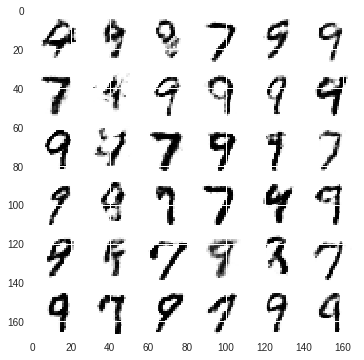

In [13]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

###Staring the Model training Session
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    for step in range(1, num_steps+1):
        batch_x, _ = df.train.next_batch(batch_size)
        
        # Generate noise to feed to the generator
        noise_temp = np.random.uniform(-1., 1., size=[batch_size, noise_dim])
        
        # Run optimization op (backprop)
        feed_dict = {disc_inp: batch_x, gen_inp: noise_temp}
        _, _, gl, dl = sess.run([training_gen, training_disc, cost_gen, cost_disc],
                            feed_dict=feed_dict)
        if step % 2000 == 0 or step == 1:
            print('Step %i: Generator Loss: %f, Discriminator Loss: %f' % (step, gl, dl))
    print("Finished!")
    
    
    # Testing
    # Generating the  images using the generator network
    n = 6
    canvas = np.empty((28 * n, 28 * n))

    for i in range(n):
      # Noise input.
      z = np.random.uniform(-1., 1., size=[n, noise_dim])
      # Generate image from noise.
      g = sess.run(gen_out, feed_dict={gen_inp: z})
      # Reverse colours for better display
      g = -1 * (g - 1)
      for j in range(n):
        # Draw the generated digits
        canvas[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28, 28])

    plt.figure(figsize=(n, n))
    plt.imshow(canvas, origin="upper", cmap="gray")
    plt.show()

    